## **Data Analysis**
### This notebook implements steps to perform data analysis. The objective of data analysis is to derive patterns and relationships between the various features in the dataset. The insights that we get will drive further data processing to prepare the dataset for training a regression model to predict rental prices

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from src.feature_eng import *

%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [18]:
CSV_FILE = "data/train_preprocessed.csv"
NEW_CSV_FILE = "data/train_feat_eng.csv"

In [20]:
dataset = pd.read_csv(CSV_FILE)
dataset.head()

,rent_approval_date,flat_model,floor_area_sqm,lease_commence_date,latitude,longitude,planning_area,region,monthly_rent,rent_approval_year,rent_approval_month,flat_type_2-room,flat_type_3-room,flat_type_4-room,flat_type_5-room,flat_type_executive,flat_model_cat
0,2021-09,new generation,67.0,1983,1.344518,103.738630,jurong east,west region,1600,2021,9,0,1,0,0,0,0
1,2022-05,new generation,92.0,1978,1.330186,103.938717,bedok,east region,2250,2022,5,0,0,1,0,0,0
2,2022-10,improved,67.0,1971,1.332242,103.845643,toa payoh,central region,1900,2022,10,0,1,0,0,0,1
3,2021-08,apartment,149.0,1993,1.370239,103.962894,pasir ris,east region,2850,2021,8,0,0,0,0,1,2
4,2022-11,improved,68.0,1972,1.320502,103.863341,kallang,central region,2100,2022,11,0,1,0,0,0,1


### Analysis 1: Determine the Relationship Between COE Prices and Rental Prices
Hypothesis: COE and rental prices give an indication of the cost of living. We expect there to be high correlation between COE prices and rental prices

#### Compute the mean monthly COE and Rental Prices

In [8]:
# compute mean monthly rental prices
mean_rental_prices = compute_mean_rental_prices(dataset)

KeyError: 'std_flat_type'

In [ ]:
# compute the mean monthly coe prices
coe_prices = pd.read_csv("data/auxiliary-data/auxiliary-data/sg-coe-prices.csv")
mean_coe_prices, dataset = compute_mean_coe_prices(coe_prices, dataset)
dataset['mean_coe_price']

0         54951.625
1         77035.625
2         89580.250
3         51997.375
4         99472.875
            ...    
59995     54951.625
59996    104404.750
59997     83323.125
59998     92845.000
59999     98624.125
Name: mean_coe_price, Length: 60000, dtype: float64

#### Compute simple Pearson Correlation Score between the two features

In [ ]:
mean_rental_prices_df = pd.DataFrame(mean_rental_prices, columns=['price'])
corr = mean_coe_prices['price'].corr(mean_rental_prices_df['price'])
corr

#### Plot the relationship between COE price and rental price

['2021-01', '2021-02', '2021-03', '2021-04', '2021-05', '2021-06', '2021-07', '2021-08', '2021-09', '2021-10', '2021-11', '2021-12', '2022-01', '2022-02', '2022-03', '2022-04', '2022-05', '2022-06', '2022-07', '2022-08', '2022-09', '2022-10', '2022-11', '2022-12', '2023-01', '2023-02', '2023-03', '2023-04', '2023-05', '2023-06', '2023-07']


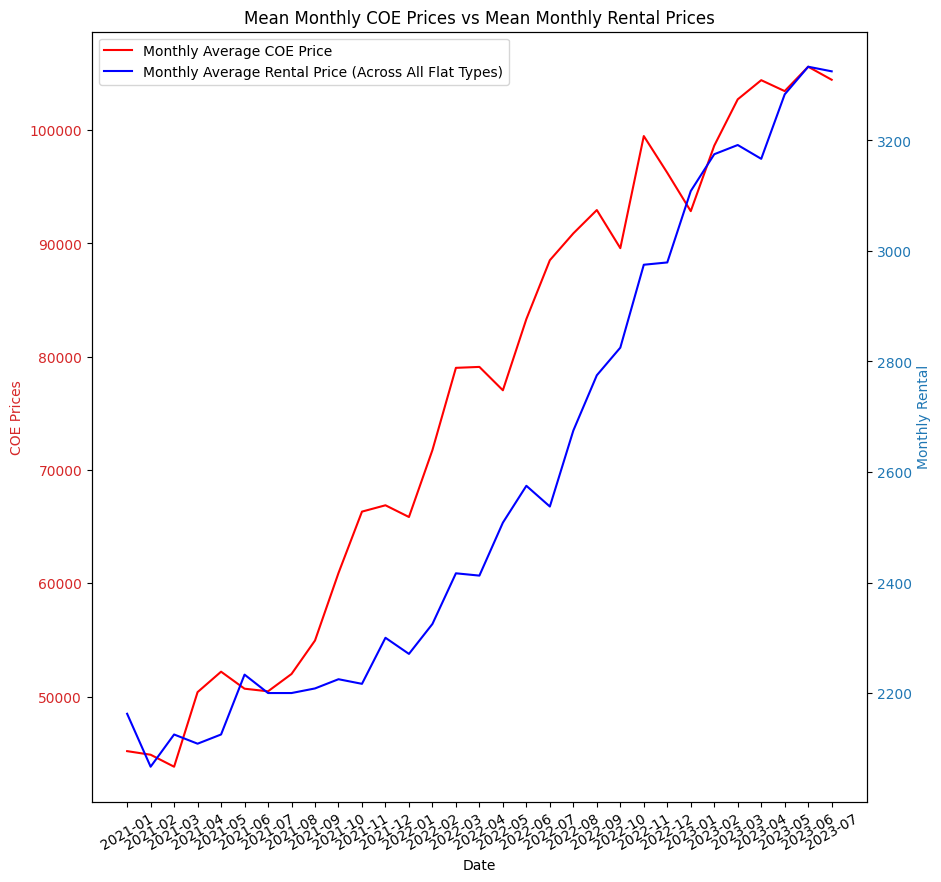

In [ ]:
date = ["2021-" + i for i in ["01", "02", "03", "04", "05", "06", "07", "08", "09", "10", "11", "12"]]
date += ["2022-" + i for i in ["01", "02", "03", "04", "05", "06", "07", "08", "09", "10", "11", "12"]]
date += ["2023-" + i for i in ["01", "02", "03", "04", "05", "06", "07"]]

fig, ax1 = plt.subplots()
fig.set_figheight(10)
fig.set_figwidth(10)


color = 'tab:red'
ax1.set_xlabel('Date')
ax1.set_ylabel('COE Prices', color=color)
ln1 = ax1.plot(date, mean_coe_prices, color='red', label="Monthly Average COE Price")
ax1.tick_params(axis='y', labelcolor=color)
ax1.tick_params(axis='x', rotation=30)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Monthly Rental', color=color)  # we already handled the x-label with ax1
ln2 = ax2.plot(date, mean_rental_prices, color='blue', label="Monthly Average Rental Price (Across All Flat Types)")
ax2.tick_params(axis='y', labelcolor=color)

lns = ln1+ln2
labs = [l.get_label() for l in lns]
plt.legend(lns, labs, loc=0)

plt.title("Mean Monthly COE Prices vs Mean Monthly Rental Prices")
plt.savefig("coe_vs_rental.png")

### Analysis 2: Determine the Relationship Between the Number of Amenities Near a House and its Rental Price
Hypothesis: The attractiveness of a living space is affected by the number of amenities nearby, including MRT stations, Shopping Malls and Schools as this brings about a higher level of convenience to home owners. Thus, we expect rental prices to be higher in locations where more amenities are nearby.

In [6]:
ref = pd.read_csv("data/auxiliary-data/auxiliary-data/amenity_data_allmrt.csv")

df = count_amenity(dataset, ref, 0.8)

In [7]:
df.head()

,rent_approval_date,flat_model,floor_area_sqm,lease_commence_date,latitude,longitude,planning_area,region,monthly_rent,rent_approval_year,rent_approval_month,flat_type_2-room,flat_type_3-room,flat_type_4-room,flat_type_5-room,flat_type_executive,flat_model_cat,amenity_count
0,2021-09,new generation,67.0,1983,1.344518,103.738630,jurong east,west region,1600,2021,9,0,1,0,0,0,0,3.0
1,2022-05,new generation,92.0,1978,1.330186,103.938717,bedok,east region,2250,2022,5,0,0,1,0,0,0,4.0
2,2022-10,improved,67.0,1971,1.332242,103.845643,toa payoh,central region,1900,2022,10,0,1,0,0,0,1,5.0
3,2021-08,apartment,149.0,1993,1.370239,103.962894,pasir ris,east region,2850,2021,8,0,0,0,0,1,2,4.0
4,2022-11,improved,68.0,1972,1.320502,103.863341,kallang,central region,2100,2022,11,0,1,0,0,0,1,4.0


In [9]:
# New label variable to measure rental price per square meter
df['rental_sqm'] = df['monthly_rent'] / df['floor_area_sqm'] 

[Text(0.5, 0, 'Amenity Count'),
 Text(0, 0.5, 'Frequency Count'),
 Text(0.5, 1.0, 'Distribution of Amenity Count by 10-min walking distance')]

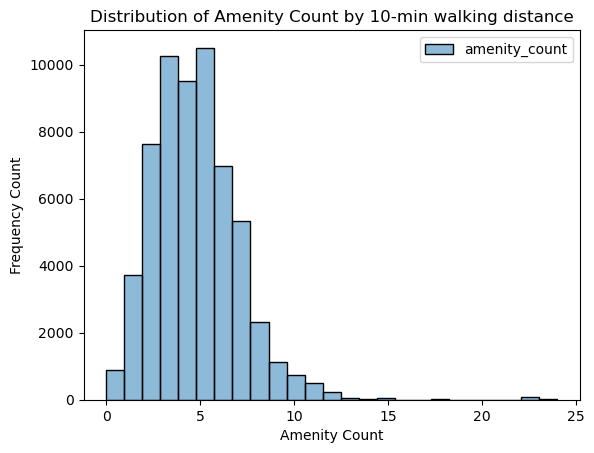

In [14]:
ax = sns.histplot(data=df[['amenity_count']], bins=25)

ax.set(xlabel='Amenity Count',
            ylabel='Frequency Count',
            title='Distribution of Amenity Count by 10-min walking distance')

[Text(0.5, 0, 'Amenity Count'),
 Text(0, 0.5, 'Median Monthly Rent'),
 Text(0.5, 1.0, 'Median Monthly Rent on Amenity Count by 10-min walking distance')]

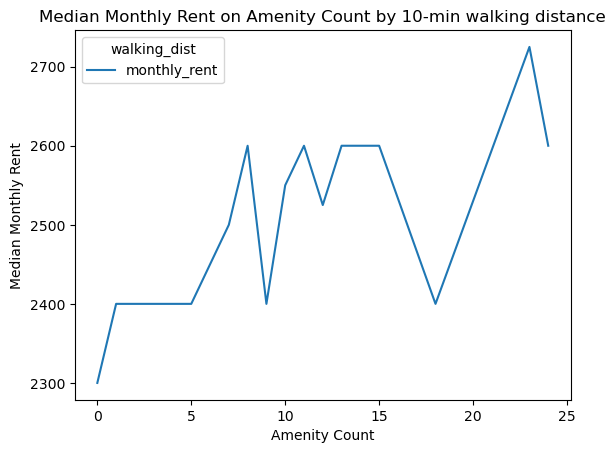

In [15]:
analysis_df = df.groupby('amenity_count').agg({'monthly_rent':np.median, 'rental_sqm':np.median})\
                                            .reset_index(drop=False)

ax = sns.lineplot(data=analysis_df[['amenity_count','monthly_rent']].melt('amenity_count', var_name='walking_dist', value_name='median_month_rent'),
             x="amenity_count",
             y='median_month_rent',
             hue='walking_dist')

ax.set(xlabel='Amenity Count',
            ylabel='Median Monthly Rent',
            title='Median Monthly Rent on Amenity Count by 10-min walking distance')

[Text(0.5, 0, 'Amenity Count'),
 Text(0, 0.5, 'Median Monthly Rent per square meter'),
 Text(0.5, 1.0, 'Median Monthly Rent/sqm on Amenity Count by 10-min walking distance')]

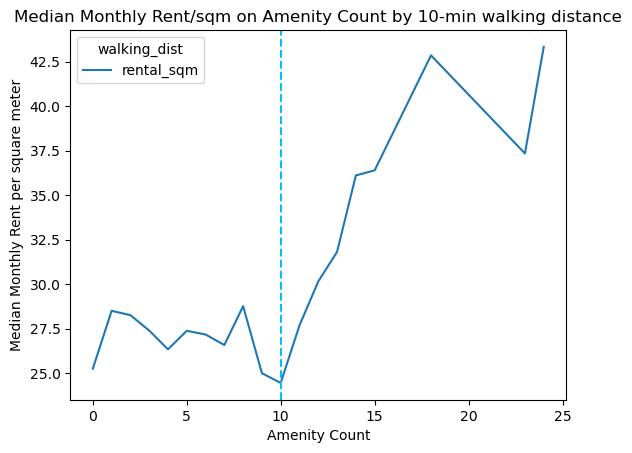

In [17]:
ax = sns.lineplot(data=analysis_df[['amenity_count','rental_sqm']].melt('amenity_count', var_name='walking_dist', value_name='median_month_rent_sqm'),
            x="amenity_count",
            y='median_month_rent_sqm',
            hue='walking_dist'
            )

ax.axvline(10, color='deepskyblue', linestyle='--')

ax.set(xlabel='Amenity Count',
            ylabel='Median Monthly Rent per square meter',
            title='Median Monthly Rent/sqm on Amenity Count by 10-min walking distance')

### Save new cleaned dataset with added feature engineered variables as a new csv file for model training

In [21]:
df.to_csv(NEW_CSV_FILE, index=False)